### Classification Trees

 * **Objective**: In this case, to infer labels of the new drug data
 * Trees work by series of if-else statements using each variable
 * Trees can capture non-linear relationships between features and outcomes
 * Advantages: No need for scaling (or standardization)

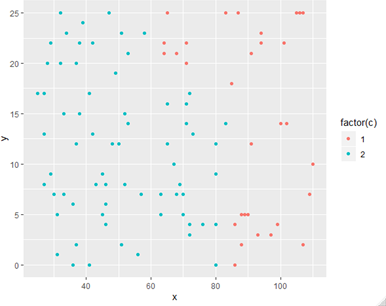

In [74]:
Image(filename='Img/treedata.png')

In [ ]:
[Click here to open notebook B](.ipynb)

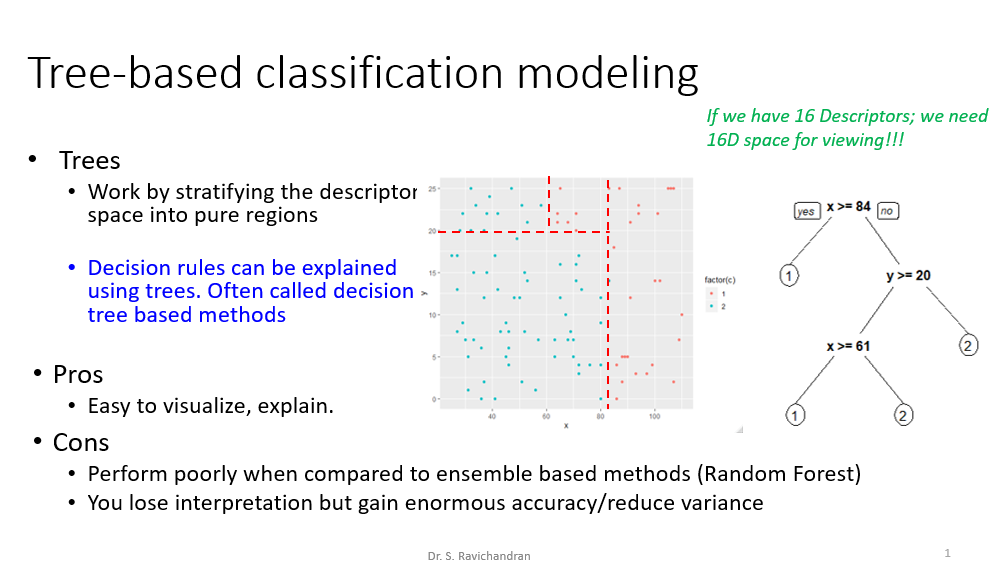

In [67]:
# from IPython.core.display import Image
Image(filename='Img/treebasics1.png')

In the above diagram (left), you can identify 4 non-overlapping regions or segments: 
* R1: {X | x >= 84}
* R2: {X | x < 84, y < 20} 
* R3: {X | x < 84, y >= 20, x >= 61} 

### Building blocks of Decision Trees

* **Nodes**: Binary split
* **Root**: A node that has only children
* **Internal node**: two children nodes
* **Leaf**: No children nodes $\Rightarrow$ Prediction

### Important features of a tree

* In the above figure, red dotted lines indicate the Decision Boundary
* Decision regions are the rectangular/ or boxed (in higher Dim) areas 

Note: In our tree example, ```x``` is the important variable in determining the outcome (1 or 2). Goal is to find regions that are pure, minimize the Residual Sum of Squares (RSS): 

## Impurity of a node 

**Regression Trees Residual Sum of squares:**
$$ \sum_{j=1}^{J} \sum_{i \in R_{j}} (y_{i} - \hat{y}_{R_{j}})^2 $$
Where $R_{j}$ are regions or boxes (ie $R_{1}, R_{2}, ..., R_{j}$), and $\hat{y}_{R_j}$ is the mean response for the training observations in the jth box.

**Classification Trees error rate:**
$$ E = 1 - \max_{k}( \hat{p}_{mk}) $$
where $\hat{p}_{mk}$ is the proportion of training observations in the ```mth``` region that belong to ```kth``` class.
Note a related measure called Gini index is preferred because this is discontinuous or jumpy.

**Gini Index**

$$ G = \sum_{k = 1}^{K} {\hat{p}_{mk}}(1 - {\hat{p}_{mk}})$$ 
or
$$ G = 1 - \sum_{k = 1}^{K} (\hat{p}^2_{mk})$$ 

Measure of variance across the K classes. Gini index will take small values if the node is pure. 

** Cross-entropy**

$$ D = -\sum_{k = 1}^{K}{ \hat{p}_{mk} log (\hat{p}_{mk}) } $$

### Information Gain 

* How does a tree chooses a feature for splitting?
    * Depends on What feature can create pure nodes. The purity of a node is measured using Information gain. 

**How do we measure information gain?**

**Information gain** 
* Decrease of entropy (randomness). 
* Computes the entropy difference between before and after the average entropy after the split. 

$$ IG(D_{p},f) = I(D_{p}) - 
\frac{N_{left}}{N} - \frac{N_{right}}{N} I(D_{p}) $$

* $N$ is the total number of samples; 
    * $N_{left}$ or $N_{right}$ is the number of samples on the left/right nodes. 
* $D_{p}$ = Parent node data
* $D_{left} \text{ or }  D_{right}$ = left/right child node data
* $f$ = Feature to be split on
* $I$: Impurity criterion  


<!-- **How to compute Entropy for a classification problem?**

$$ \textrm{Entropy} = -\sum_{i = 1}^{C} f_{i}log f_{i}$$

Where $f_{i}$ is the frequency of label i at a node and C is the
number of unique labels

**How to compute Gini impurity for a classification problem?** 
$$ \textrm{Gini_impurity} = -\sum_{i = 1}^{C } f_{i} (1-f_{i})$$ -->

### Pros and Cons of Tree-based methods

### Pros: 
* Simple and easy to visualize/explain
* Easy for interpretation
* Top-down greedy approach 
* Can build non-linear models 
* no need to create dummy variables for qualitative variables

### Cons:
* Prediction accuracy is not good compared to ensembl based tree methods (random forest, bagging, boosting etc.)
    
### Improvements
Pruning and other methods are used to improve the predictive performance. We will not discus them here.
You can refer to any standard ML book for details.

## Random Forest

* Each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

* when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size **max_features**.

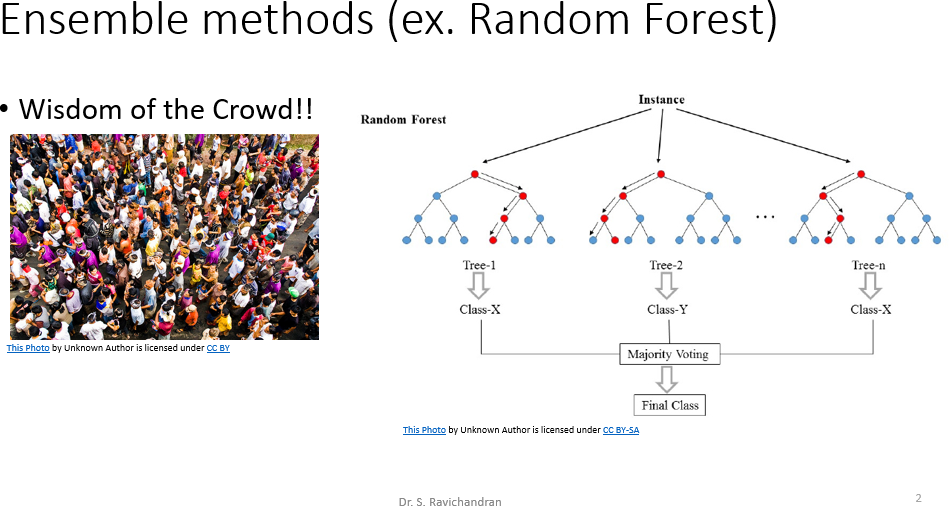

In [68]:
Image(filename='Img/RF1.png')

### What does the ensembl method works? 
(based on T. Hastie and R. Tibshirani's lectures)

Suppose if we are given ```n``` independent observations (ex bp measurements; $X_{1}, ...., X_{n}$) each with 
variance $\sigma^2$. The variance of the mean $\bar{X}$ of observations is given by $\frac{\sigma^2}{n}$

By averaging we have reduced the variance. This is the idea behind Bagging and Ensemble based modeling.

Bagging, we achieve this by taking repeated samples from the same training data. Here are the steps:
* Generate B diferent bootstrapped training data
* Build a tree for each bootstrapped sample (no need for pruning)
* Make prediction for a point x on each tree, then average the predictions 

**Regression:** 
$$ \hat{f}_{bag}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{*b}(x) $$
  
**Classification** 
Take the majority vote
Where B is the total number of trees. x is the point (collection of independent variables)

### Hyperparameters vs Model Parameters

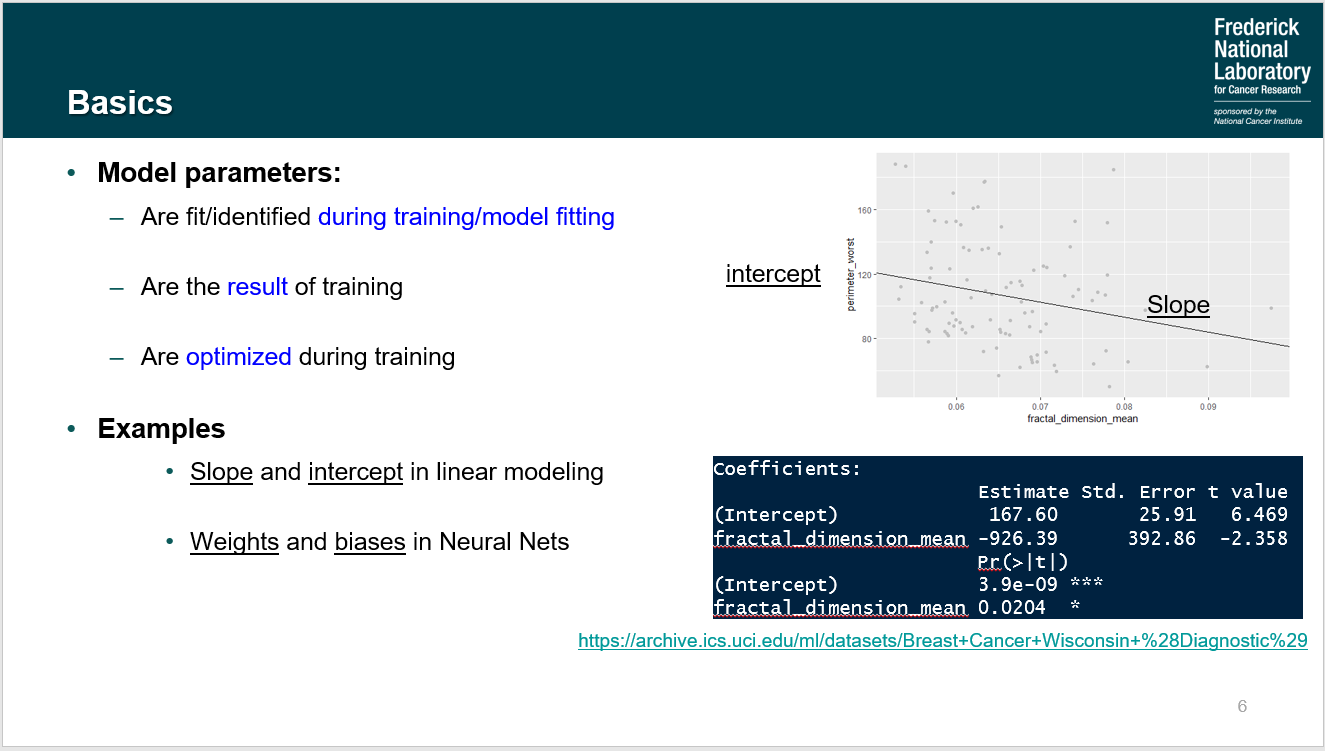

In [69]:
Image(filename='Img/HPO-1.png')

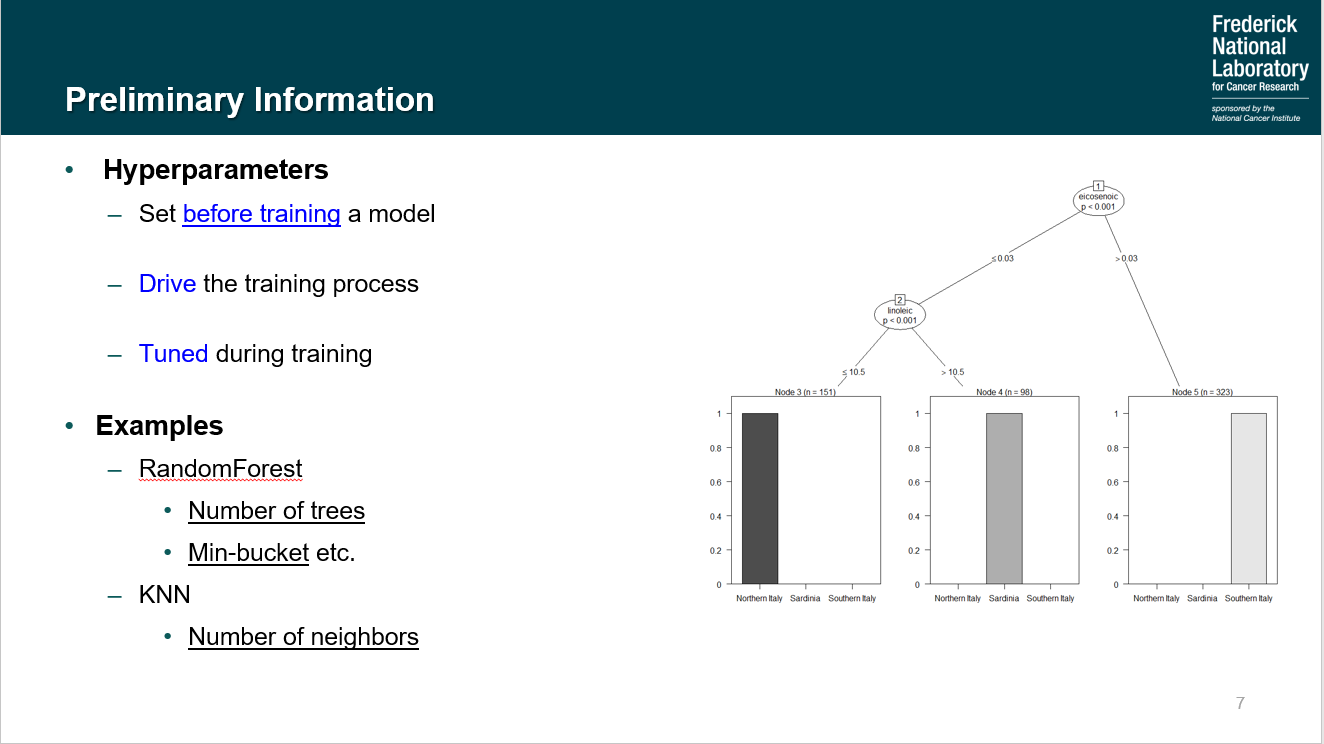

In [70]:
Image(filename='Img/HPO-2.png')